### Importing required packages

In [129]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Creating Session object

In [22]:
spark = SparkSession.builder \
    .appName("FARS Analysis") \
    .master("local[*]") \
    .config("spark.sql.shuffle.partitions", "4") \
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
    .config("spark.kryo.registrationRequired", "false")\
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .getOrCreate()

In [23]:
acc = spark.read.format("parquet").load("/FARS/Clean_data/acc/")
veh = spark.read.format("parquet").load("/FARS/Clean_data/veh/")
per = spark.read.format("parquet").load("/FARS/Clean_data/per/")

## Accidents file Analysis

In [30]:
acc.createOrReplaceTempView("acc")

In [46]:
acc.printSchema()

root
 |-- ST_CASE: integer (nullable = true)
 |-- State: integer (nullable = true)
 |-- Crash_injury_type: string (nullable = true)
 |-- Crash_type: string (nullable = true)
 |-- Time_of_day: string (nullable = true)
 |-- Distracted_driver: string (nullable = true)
 |-- Day_of_week: string (nullable = true)
 |-- Drowsy_driver: string (nullable = true)
 |-- Hit_run: string (nullable = true)
 |-- Intersection: string (nullable = true)
 |-- Junction: string (nullable = true)
 |-- Involve_large_truck: string (nullable = true)
 |-- Type_of_collision: integer (nullable = true)
 |-- Involve_motorcycle: string (nullable = true)
 |-- Involve_pedestrain: string (nullable = true)
 |-- Positive_blood_alcohol: string (nullable = true)
 |-- Roadway_departure: string (nullable = true)
 |-- Roadway_func_class: integer (nullable = true)
 |-- Crash_with_rollover: string (nullable = true)
 |-- Involve_speeding: string (nullable = true)
 |-- YEAR: integer (nullable = true)



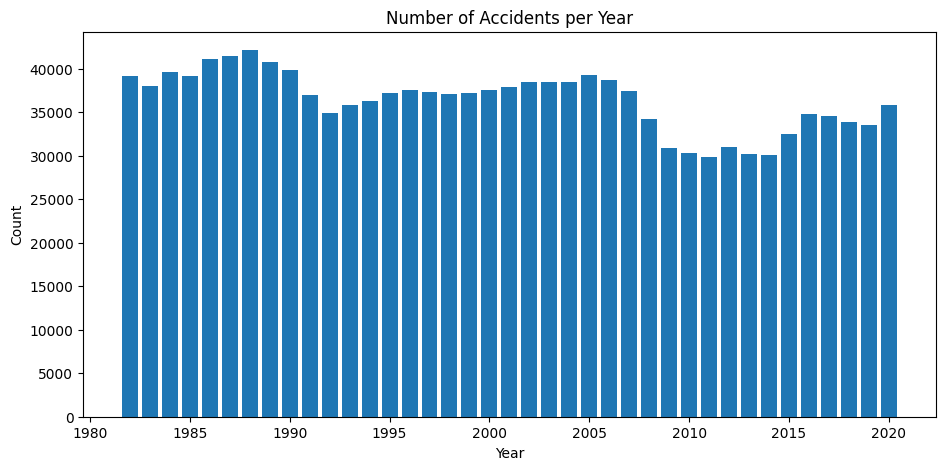

In [71]:
result = spark.sql("SELECT YEAR, COUNT(1) as count FROM acc GROUP BY YEAR ORDER BY YEAR").toPandas()

fig, ax = plt.subplots(figsize=(11, 5))

ax.bar(result["YEAR"], result["count"])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of Accidents per Year")
plt.show()

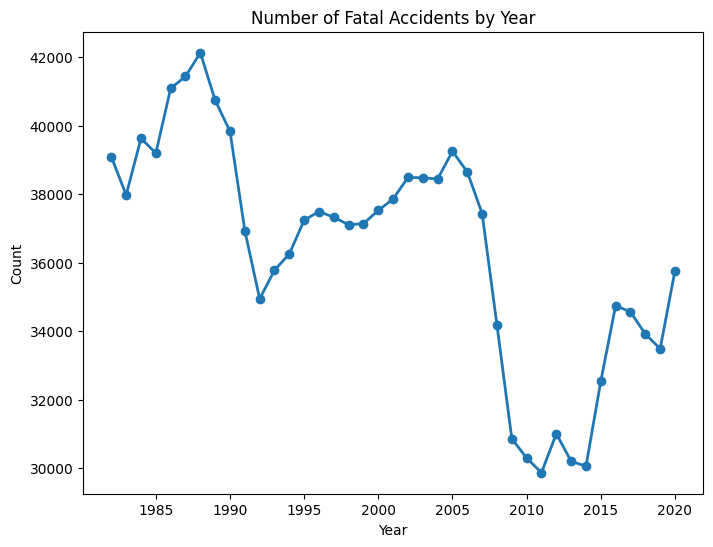

In [63]:
result = spark.sql("SELECT YEAR, COUNT(*) as count FROM acc WHERE Crash_injury_type = 'Fatal' GROUP BY YEAR ORDER BY YEAR").toPandas()

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(result["YEAR"], result["count"], linewidth=2, marker='o')

ax.set_title("Number of Fatal Accidents by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
plt.show()

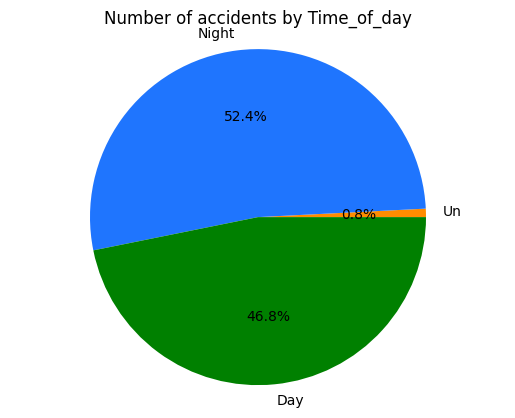

In [106]:
result = spark.sql("SELECT Time_of_day, COUNT(*) AS count FROM acc GROUP BY Time_of_day").toPandas()

plt.pie(result['count'], labels=result['Time_of_day'], autopct='%1.1f%%', colors=['darkorange','#1F75FE', 'green'])

plt.axis('equal')
plt.title('Number of accidents by Time_of_day')
plt.show()

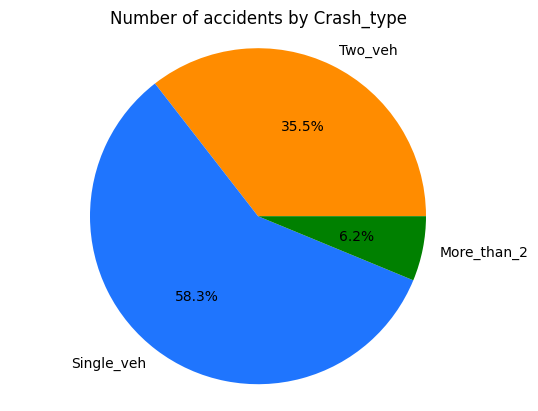

In [107]:
result = spark.sql("SELECT Crash_type, COUNT(*) AS count FROM acc GROUP BY Crash_type").toPandas()

plt.pie(result['count'], labels=result['Crash_type'], autopct='%1.1f%%', colors=['darkorange','#1F75FE', 'green'])

plt.axis('equal')
plt.title('Number of accidents by Crash_type')
plt.show()

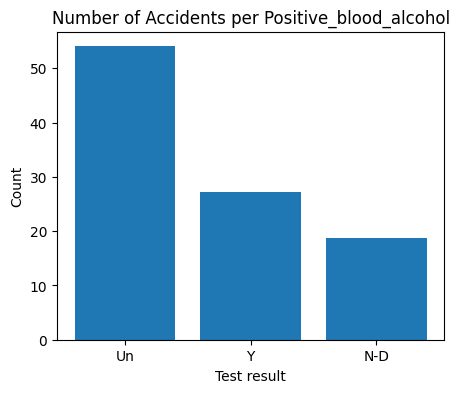

In [153]:
result = spark.sql("SELECT Positive_blood_alcohol, COUNT(1) as count FROM acc GROUP BY Positive_blood_alcohol ORDER BY count desc").toPandas()

fig, ax = plt.subplots(figsize=(5, 4))

total_count = result['count'].sum()
result['count_percent'] = (result['count'] / total_count) * 100

ax.bar(result["Positive_blood_alcohol"], result["count_percent"])
plt.xlabel("Test result")
plt.ylabel("Count")
plt.title("Number of Accidents per Positive_blood_alcohol")
plt.show()

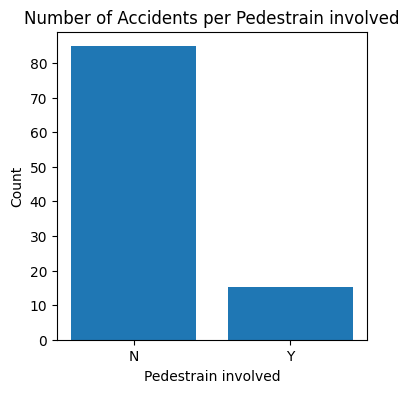

In [152]:
result = spark.sql("SELECT Involve_pedestrain, COUNT(1) as count FROM acc GROUP BY Involve_pedestrain ORDER BY count desc").toPandas()

fig, ax = plt.subplots(figsize=(4, 4))

total_count = result['count'].sum()
result['count_percent'] = (result['count'] / total_count) * 100

ax.bar(result["Involve_pedestrain"], result["count_percent"])
plt.xlabel("Pedestrain involved")
plt.ylabel("Count")
plt.title("Number of Accidents per Pedestrain involved")
plt.show()

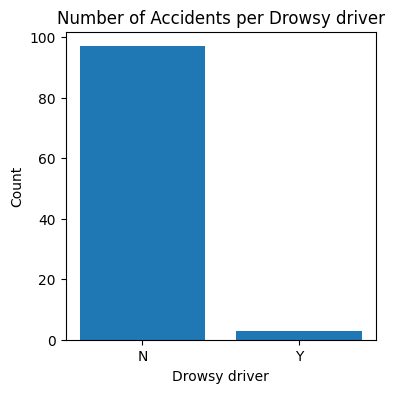

In [151]:
result = spark.sql("SELECT Drowsy_driver, COUNT(1) as count FROM acc GROUP BY Drowsy_driver ORDER BY count desc").toPandas()

fig, ax = plt.subplots(figsize=(4, 4))

total_count = result['count'].sum()
result['count_percent'] = (result['count'] / total_count) * 100

ax.bar(result["Drowsy_driver"], result["count_percent"])
plt.xlabel("Drowsy driver")
plt.ylabel("Count")
plt.title("Number of Accidents per Drowsy driver")
plt.show()

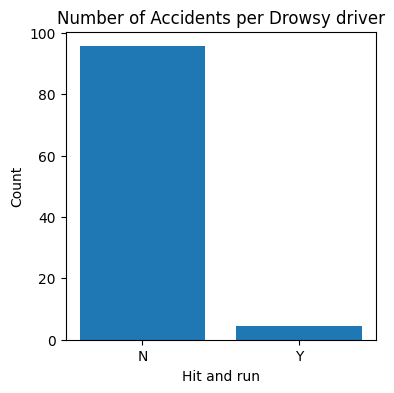

In [148]:
result = spark.sql("SELECT Hit_run, COUNT(1) as count FROM acc GROUP BY Hit_run ORDER BY count desc").toPandas()

fig, ax = plt.subplots(figsize=(4, 4))

total_count = result['count'].sum()
result['count_percent'] = (result['count'] / total_count) * 100

ax.bar(result["Hit_run"], result["count_percent"])
plt.xlabel("Hit and run")
plt.ylabel("Count")
plt.title("Number of Accidents per Drowsy driver")
plt.show()

## Vechile file Analysis

In [126]:
veh.createOrReplaceTempView("veh")

In [127]:
veh.printSchema()

root
 |-- ST_CASE: integer (nullable = true)
 |-- Veh_body_type: string (nullable = true)
 |-- Distracted_driver: string (nullable = true)
 |-- Drowsy_driver: string (nullable = true)
 |-- Ini_impact_point: string (nullable = true)
 |-- License_status: string (nullable = true)
 |-- Speeding_involved: string (nullable = true)
 |-- School_bus: string (nullable = true)
 |-- Rollover: string (nullable = true)
 |-- YEAR: integer (nullable = true)



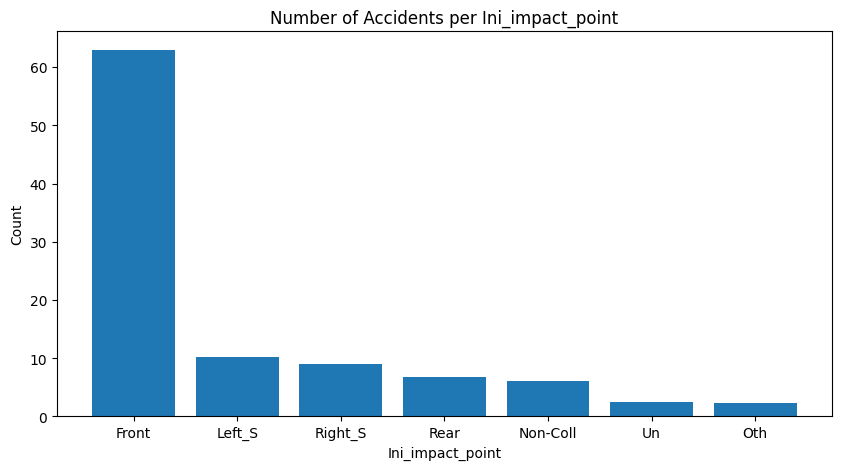

In [147]:
result = spark.sql("SELECT Ini_impact_point, COUNT(1) as count FROM veh GROUP BY Ini_impact_point ORDER BY count desc").toPandas()

fig, ax = plt.subplots(figsize=(10, 5))

total_count = result['count'].sum()
result['count_percent'] = (result['count'] / total_count) * 100

ax.bar(result["Ini_impact_point"], result["count_percent"])
plt.xlabel("Ini_impact_point")
plt.ylabel("Count")
plt.title("Number of Accidents per Ini_impact_point")
plt.show()

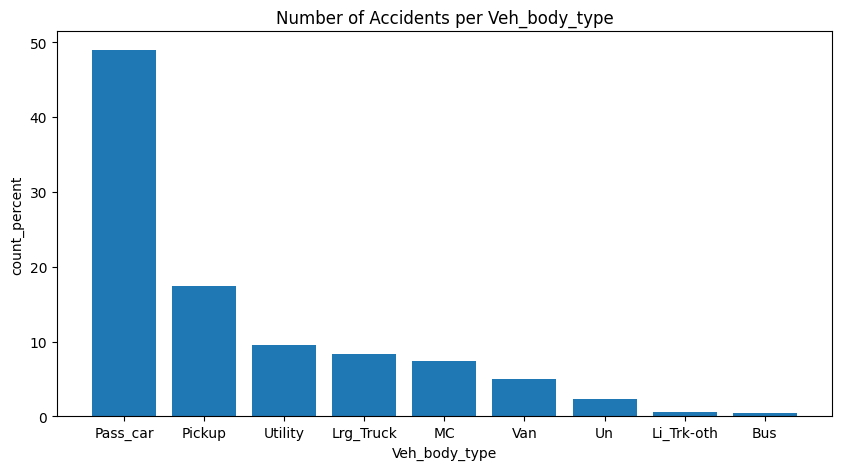

In [146]:
result = spark.sql("SELECT Veh_body_type, COUNT(1) as count FROM veh GROUP BY Veh_body_type ORDER BY count desc").toPandas()

fig, ax = plt.subplots(figsize=(10, 5))

total_count = result['count'].sum()
result['count_percent'] = (result['count'] / total_count) * 100

ax.bar(result["Veh_body_type"], result["count_percent"])
plt.xlabel("Veh_body_type")
plt.ylabel("count_percent")
plt.title("Number of Accidents per Veh_body_type")
    
plt.show()

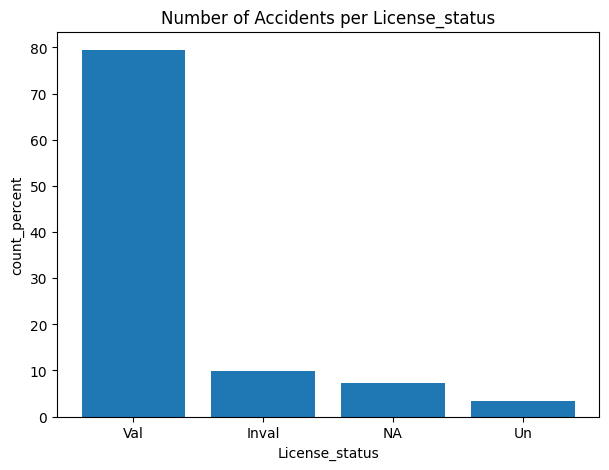

In [155]:
result = spark.sql("SELECT License_status, COUNT(1) as count FROM veh GROUP BY License_status ORDER BY count desc").toPandas()

fig, ax = plt.subplots(figsize=(7, 5))

total_count = result['count'].sum()
result['count_percent'] = (result['count'] / total_count) * 100

ax.bar(result["License_status"], result["count_percent"])
plt.xlabel("License_status")
plt.ylabel("count_percent")
plt.title("Number of Accidents per License_status")
    
plt.show()

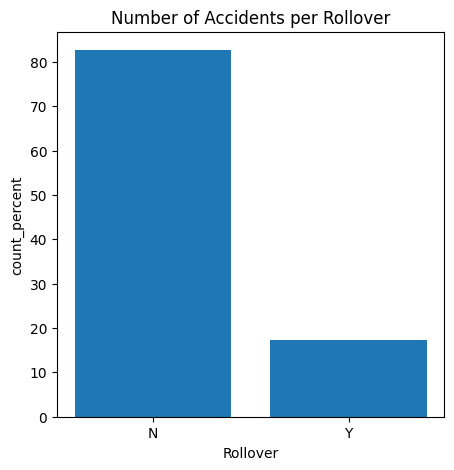

In [169]:
result = spark.sql("SELECT Rollover, COUNT(1) as count FROM veh GROUP BY Rollover ORDER BY count desc").toPandas()

fig, ax = plt.subplots(figsize=(5, 5))

total_count = result['count'].sum()
result['count_percent'] = (result['count'] / total_count) * 100

ax.bar(result["Rollover"], result["count_percent"])
plt.xlabel("Rollover")
plt.ylabel("count_percent")
plt.title("Number of Accidents per Rollover")
    
plt.show()

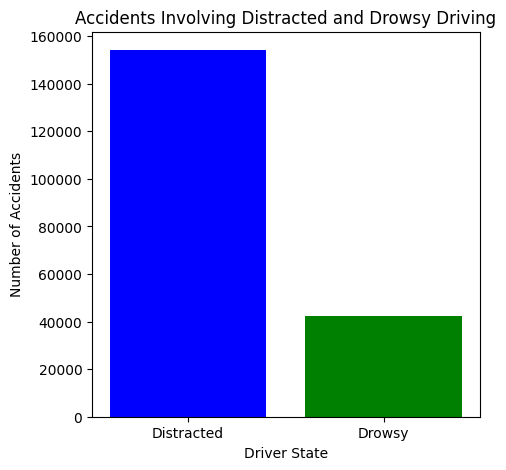

In [158]:
distracted = veh.filter(veh.Distracted_driver == "Y")
drowsy = veh.filter(veh.Drowsy_driver == "Y")

# count the number of accidents for each category
distracted_count = distracted.count()
drowsy_count = drowsy.count()

# create a bar chart
fig, ax = plt.subplots(figsize=(5, 5))
ax.bar(["Distracted", "Drowsy"], [distracted_count, drowsy_count], color=["blue","green"])
ax.set_xlabel("Driver State")
ax.set_ylabel("Number of Accidents")
ax.set_title("Accidents Involving Distracted and Drowsy Driving")
plt.show()

## Persons file Analysis

In [159]:
per.createOrReplaceTempView("per")

In [161]:
per.printSchema()

root
 |-- ST_CASE: integer (nullable = true)
 |-- Age_group: string (nullable = true)
 |-- Alcohol_test: string (nullable = true)
 |-- Ejected: string (nullable = true)
 |-- Helmet_use: string (nullable = true)
 |-- Person_injury_type: string (nullable = true)
 |-- Person_type: string (nullable = true)
 |-- YEAR: integer (nullable = true)



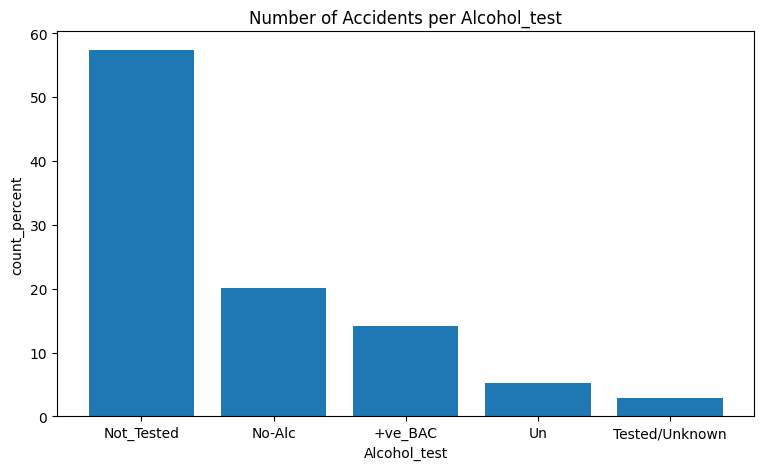

In [173]:
result = spark.sql("SELECT Alcohol_test, COUNT(1) as count FROM per GROUP BY Alcohol_test ORDER BY count desc").toPandas()

fig, ax = plt.subplots(figsize=(9, 5))

total_count = result['count'].sum()
result['count_percent'] = (result['count'] / total_count) * 100

ax.bar(result["Alcohol_test"], result["count_percent"])
plt.xlabel("Alcohol_test")
plt.ylabel("count_percent")
plt.title("Number of Accidents per Alcohol_test")
    
plt.show()

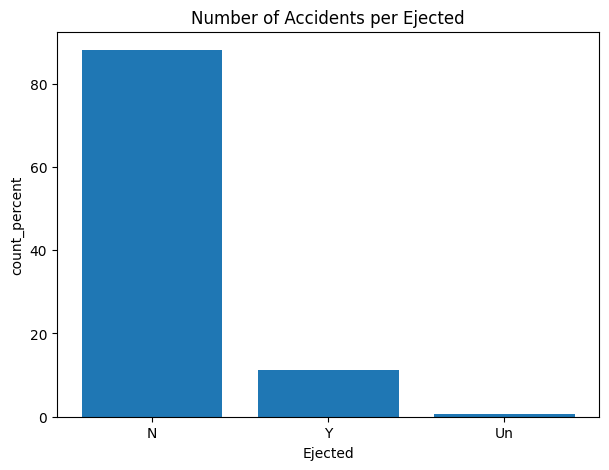

In [176]:
result = spark.sql("SELECT Ejected, COUNT(1) as count FROM per GROUP BY Ejected ORDER BY count desc").toPandas()

fig, ax = plt.subplots(figsize=(7, 5))

total_count = result['count'].sum()
result['count_percent'] = (result['count'] / total_count) * 100

ax.bar(result["Ejected"], result["count_percent"])
plt.xlabel("Ejected")
plt.ylabel("count_percent")
plt.title("Number of Accidents per Ejected")
    
plt.show()

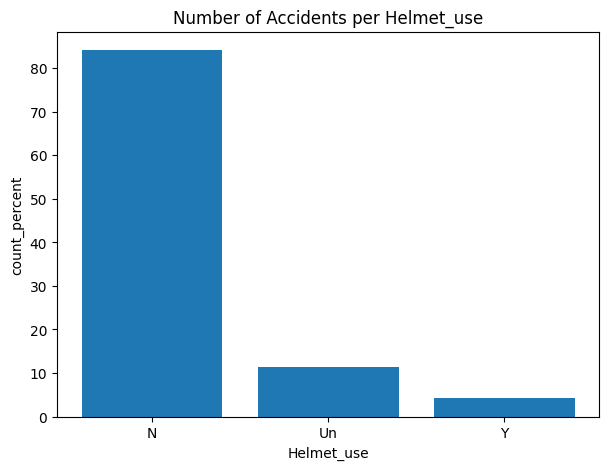

In [186]:
result = spark.sql("SELECT Helmet_use, COUNT(1) as count FROM per where YEAR > 1998 GROUP BY Helmet_use ORDER BY count desc").toPandas()

fig, ax = plt.subplots(figsize=(7, 5))

total_count = result['count'].sum()
result['count_percent'] = (result['count'] / total_count) * 100

ax.bar(result["Helmet_use"], result["count_percent"])
plt.xlabel("Helmet_use")
plt.ylabel("count_percent")
plt.title("Number of Accidents per Helmet_use")
    
plt.show()

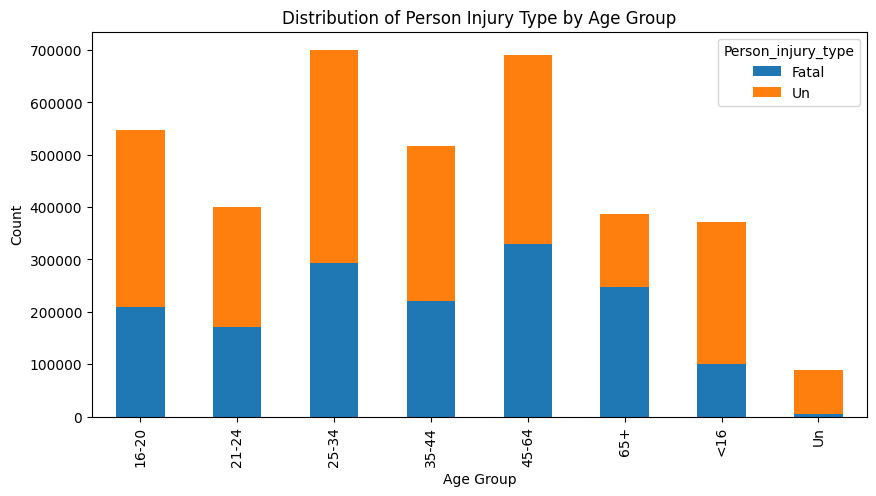

In [165]:
result = spark.sql("SELECT Age_group, Person_injury_type, COUNT(*) as count FROM per GROUP BY Age_group, Person_injury_type").toPandas()

pivot_table = pd.pivot_table(result, values='count', index='Age_group', columns='Person_injury_type')

pivot_table.plot(kind='bar', stacked=True, figsize=(10,5))
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Person Injury Type by Age Group")
plt.show()

## Advanced Analysis

In [202]:
import plotly.express as px

# create a dataframe with state and number of accidents
df = spark.sql("SELECT STATE, COUNT(*) as num_accidents FROM acc GROUP BY STATE").toPandas()

# specify the data dictionary for US states
us_states = {'STATE': {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado', 
                       9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 
                       15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 
                       21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 25: 'Massachusetts', 
                       26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 
                       31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
                       36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma', 
                       41: 'Oregon', 42: 'Pennsylvania', 43: 'Puerto Rico', 44: 'Rhode Island', 45: 'South Carolina', 
                       46: 'South Dakota', 47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 
                       52: 'Virgin Islands', 53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming'}}

# create a choropleth map
fig = px.choropleth(df, 
                    locations='STATE',
                    locationmode='USA-states',
                    geojson=us_states, 
                    color='num_accidents',
                    scope="usa",
                    hover_data=["STATE", "num_accidents"])

# customize the hover text
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>Number of accidents: %{z}')

# set the map title
fig.update_layout(title='Number of Accidents per State')

# show the map
fig.show()


California, Texas and Florida have by far highest absolute number of fatalities.